In [74]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Importando os dados da nossa tabela

In [62]:
file = ('Tabela_QM9_Termodinamica.xlsx')
df = pd.read_excel(file, header=0, usecols=[0, 7, 8, 9])

In [63]:
df.head(10)

,Fórmula,Smiles,Massa Molar (g/mol),Entalpia de Combustão (kcal/mol)
0,CH4,C,16.043,239.315162
1,H3N,N,17.031,0.000000
2,H2O,O,18.015,0.000000
3,C2H2,C#C,26.038,246.164372
4,CHN,C#N,27.026,0.000000
5,CH2O,C=O,30.026,62.878915
6,C2H6,CC,30.070,385.639048
7,CH4O,CO,32.042,153.010001
8,C3H4,C#CC,40.065,382.813316
9,C2H3N,CC#N,41.053,0.000000


In [66]:
df_treat = df[(df != 0.0000).all(axis=1)]

In [73]:
df_treat_copy = df_treat.copy()

for data in enumerate(df_treat_copy):
    scaler = StandardScaler() # Define a escala padrão de normalização
    #df_treat_copy["Massa normalizada"] = scaler.fit_transform(df_treat_copy[["Massa Molar (g/mol)"]]) # Normaliza os dados da massa
    df_treat_copy["Massa normalizada"] = (df_treat_copy.iloc[:, 2] - df_treat_copy.iloc[:, 2].min()) / (df_treat_copy.iloc[:, 2].max() - df_treat_copy.iloc[:, 2].min()) # Normaliza manualmente
    
df_treat_copy.head(10)

for data in enumerate(df_treat_copy):
    scaler = StandardScaler() # Define a escala padrão de normalização
    #df_treat_copy["Entalpia normalizada"] = scaler.fit_transform(df_treat_copy[["Entalpia de Combustão (kcal/mol)"]]) # Normaliza os dados da combustão
    df_treat_copy["Entalpia normalizada"] = (df_treat_copy.iloc[:, 3] - df_treat_copy.iloc[:, 3].min()) / (df_treat_copy.iloc[:, 3].max() - df_treat_copy.iloc[:, 3].min()) # Normaliza manualmente
df_treat_copy.head(500)

,Fórmula,Smiles,Massa Molar (g/mol),Entalpia de Combustão (kcal/mol),Massa normalizada,Entalpia normalizada
0,CH4,C,16.043,239.315162,0.000000,0.272445
3,C2H2,C#C,26.038,246.164372,0.083220,0.276705
5,CH2O,C=O,30.026,62.878915,0.116424,0.162707
6,C2H6,CC,30.070,385.639048,0.116790,0.363455
7,CH4O,CO,32.042,153.010001,0.133210,0.218766
...,...,...,...,...,...,...
1222,C4H6O3,CC(=O)COC=O,102.089,188.716382,0.716429,0.240974
1224,C4H6O3,CC(=O)OCC=O,102.089,185.494120,0.716429,0.238970
1232,C7H8,C#CC#CC(C)C,92.141,801.815053,0.633601,0.622304
1234,C6H6O,C#CC#CC(C)O,94.113,565.267209,0.650020,0.475178


Text(0, 0.5, 'Entalpia')

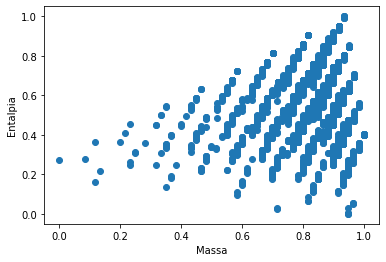

In [84]:
plt.scatter(df_treat_copy.iloc[:, 4], df_treat_copy.iloc[:, 5])
plt.xlabel('Massa')
plt.ylabel('Entalpia')

### Funções básicas

In [14]:
def gene_combustivel():
    """ Busca aleatória dentro da base de dados um combustivel
    Retorna:
        Um compsoto escolhido aleatóriamente pelo seu índice, nosso gene
    """
    #fazendo lista dos índices dos nossos compostos
    lista_indices = df.index.tolist()
    # Escolhendo um índice aleatório dentro da lista de índices
    indice_aleatorio = random.choice(lista_indices)
    # indica qual composto corresponde ao indice aleatório escolhido
    # composto = df.loc[indice_aleatorio, 'Smiles']
    composto = indice_aleatorio
    return composto

In [18]:
def individuo_combustivel():
    """Pega um gene aleatóriamente
    Retorna:
        um combustivel
    """
    individuo = gene_combustivel()
    return individuo

In [22]:
individuo_combustivel()

93342

In [12]:
def pop_posto(tamanho):
    """Agrupa os individuos para formar a população de dupla de combustíveis (posto)
    Argumentos:
        tamanho: tamanho da população, quantos individuos a compõe
    Retorna:
        população com número de individuos escolhidos
    """
    posto = []
    for _ in range(tamanho):
        posto.append(individuo_combustivel())
    return posto
    

In [13]:
def selecao_combustivel(populacao, fitness):
    """Seleciona individuos de uma população usando o método da roleta.
    Nota: apenas funciona para problemas de maximização.
    Args:
      populacao: lista com todos os individuos da população
      fitness: lista com o valor da funcao objetivo dos individuos da população
    Returns:
      População dos indivíduos selecionados.
    """
    populacao_selecionada = random.choices(
        populacao, weights=fitness, k=len(populacao)
    )
    return populacao_selecionada

In [23]:
def obj_posto_avaliacao(individuo):
    """ Calcular o fitness do individuo, usando uma função matemática
    Argumentos:
        individuo: lista com dois combustiveis selecionados aleatoriamente
    Retorna:
        O fitness de cada um indivíduo
    """
    # separa os genes dentro do individuo, para avaliar separadamente
    # pega os seus indices
    # comb1 = individuo[0]
    # comb2 = individuo[1]
    # Pega a informação de entalpia de cada um dos combustiveis
    #Hc1 = df.loc[comb1, 'Entalpia de Combustão (kcal/mol)']
    #Hc2 = df.loc[comb2, 'Entalpia de Combustão (kcal/mol)']
    Hc = df.loc[individuo, 'Entalpia de Combustão (kcal/mol)']
    # Pega a massa molar de cada um dos combustiveis
    #Mmol1 = df.loc[comb1, 'Massa Molar (g/mol)']
    #Mmol2 = df.loc[comb2, 'Massa Molar (g/mol)']
    Mmol = df.loc[individuo, 'Massa Molar (g/mol)']
    
    # Faz função afim para avaliar o valor da entalpia
    #y1 = 2*Hc1
    #y2 = 2*Hc2
    y = 2* Hc
    
    # Faz função para avaliar o valor da massa molar
    #g1 = 10000/Mmol1
    #g2 = 10000/Mmol2
    g = 1000/Mmol
    
    # junta essas informações
    fitness = y+g
    return  fitness

In [ ]:
def mutacao_posto(individuo):
    """Muda o individuo 
    """